In [1]:
pip install config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [3]:
# load imports
# pip install config
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import config
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [4]:
df = pd.read_csv("insurance.csv")

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.shape

(1338, 7)

In [8]:
# categorical data on sex
male = df[df['sex'] == 'male']['charges']
female = df[df['sex'] == 'female']['charges']

In [9]:
# categorical data on region
region_southwest = df[df['region'] == 'southwest']['charges']
region_southeast = df[df['region'] == 'southeast']['charges']
region_northeast = df[df['region'] == 'northeast']['charges']
region_northwest = df[df['region'] == 'northwest']['charges']

In [10]:
# data cleaning
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
# linear regression
df.drop_duplicates(inplace=True)
df.shape

(1337, 7)

In [12]:
# encode sex and smoker
label = preprocessing.LabelEncoder()
df1 = df
df1['sex'] = label.fit_transform(df['sex'])
df1['smoker'] = label.fit_transform(df['smoker'])
df1['region'] = label.fit_transform(df['region'])
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [13]:
features = ["age","sex","bmi","children","smoker"]
x = df1[features]
y = df1["charges"]

In [14]:
# splitting the datasets to train and test
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y)

In [15]:
# all features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr=LinearRegression()
lr.fit(train_x,train_y)
pred_lr_y=lr.predict(test_x)
r2_lr=r2_score(test_y, pred_lr_y)
r2_lr, np.sqrt(mean_squared_error(test_y,pred_lr_y))

(0.706694456365075, 6674.358646419866)

In [16]:
def ScatterPlot(hue,title):
    fig, axes =plt.subplots(1,2, figsize=(12,4))
    fig.suptitle(title)
    sns.scatterplot(x='age',y='charges',hue=hue,data=df,ax=axes[0])
    sns.scatterplot(x='bmi',y='charges',hue=hue,data=df,ax=axes[1])
    fig.tight_layout()

In [17]:
# In order to select our best-fit features for medical cost predictin, first we will simply visualize the datapoints using relations. 
# Scatterplots for all variables. The purpose of the step is to visualize distinctive features related to charges.
# Next step will be using numerical method to chooses our features. 

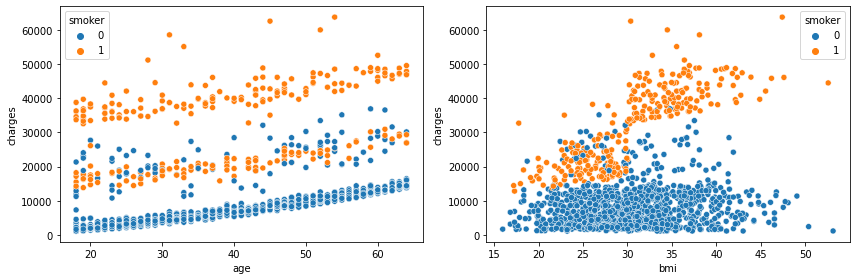

In [18]:
# Age Vs. Charges & BMI Vs. charges separated by: Smoker
ScatterPlot('smoker', '')

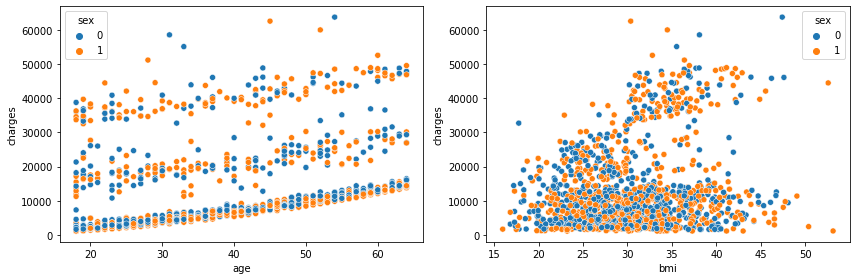

In [19]:
# Age Vs. Charges & BMI Vs. charges separated by: Sex
ScatterPlot('sex','')

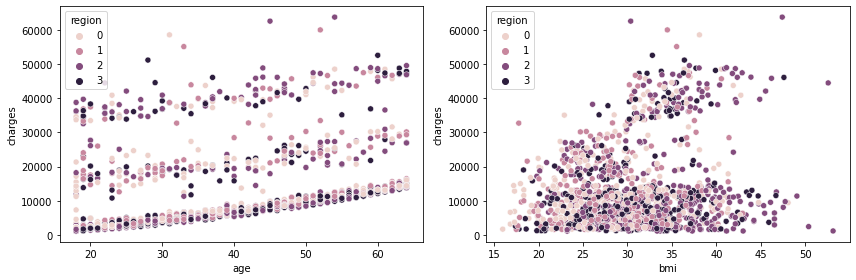

In [20]:
# Age Vs. Charges & BMI Vs. charges separated by: Region
ScatterPlot('region','')

In [21]:
X = df1.drop('charges', axis=1).values
y = df1['charges']

y = y.astype(int)

print(X.shape)
print(y.shape)

(1337, 6)
(1337,)


In [22]:
# Decision Tree is a method for regression, we used it for rank importance of features in predicting charges. 
# Features are shuffled n times and the model refitted to estimate the importance of it. 
# In the below case, age (0.42) and bmi (0.33) are the values strongerly related to charges. Thus, we will first use them implementing regression. 

In [23]:
# importance 
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [24]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [25]:
fi_col = []
fi = []

for i,column in enumerate(df1.drop('charges', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for age is : 0.42175048342670046
The feature importance for sex is : 0.07534062309601461
The feature importance for bmi is : 0.3333674316537561
The feature importance for children is : 0.06787486959321948
The feature importance for smoker is : 0.019048641638405025
The feature importance for region is : 0.08261795059190426


In [26]:
dt.feature_importances_[i]

0.08261795059190426

In [27]:
df2 = df1.loc[df1['age']]

In [28]:
# split the data
features = ["age","sex","bmi","children","smoker"]
x1 = df2[features]
y1 = df2[["charges"]]

train_x1,test_x1,train_y1,test_y1 = train_test_split(x1,y1)
df2.head()

,age,sex,bmi,children,smoker,region,charges
19,30,1,35.300,0,1,3,36837.46700
18,56,1,40.300,0,0,3,10602.38500
28,23,1,17.385,1,0,1,2775.19215
33,63,1,28.310,0,0,1,13770.09790
32,19,0,28.600,5,0,3,4687.79700


In [29]:
# SIMPLE REGRESSION
# Equation: y = ax+b

# a = slope
# b = intercept
# x = input
# y = output

# The coefficient for age vs charges is 192.37. However the R2 is 0.04 is quite low which indicates low accuracy of this model.

# Based on below result, equation to predict output variable using age as an input would be like,
# y = (192.37157976 * x) + 9455.3300572

In [30]:
# AGE: 
# features = ["age","sex","bmi","children","smoker"]
x2 = df2[["age"]] 
y2 = df2[["charges"]]

lr = linear_model.LinearRegression()
lr_model = lr.fit(x2, y2)

predictions = lr_model.predict(x2)

slr_error = y2 - predictions
df2['slr_error2'] = slr_error

print ('Slope: ', lr_model.coef_)
print ('Intercept: ',lr_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y2.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y2.values) ** 2))
print("R2-score: %.2f" % r2_score(y2.values, predictions))

Slope:  [[192.37157976]]
Intercept:  [9455.3300572]
Mean absolute error: 12626.98
Residual sum of squares (MSE): 211253607.93
R2-score: 0.04


In [51]:
df2.shape

(1337, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


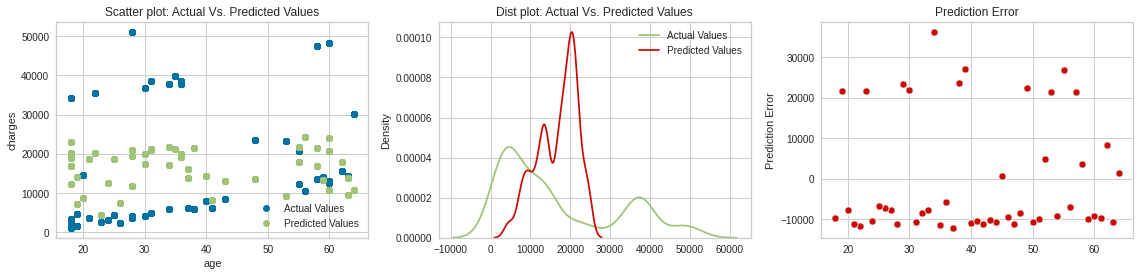

In [53]:
fig, axes =plt.subplots(1,3, figsize=(16,4))
axes[0].plot(x2['age'], y2,'bo',label='Actual Values')
axes[0].plot(x2['age'], predictions,'go',label='Predicted Values')
axes[0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0].set_xlabel("age")
axes[0].set_ylabel("charges")
axes[0].legend()

sns.distplot(y2, hist=False, color="g", label="Actual Values",ax=axes[1])
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" , ax=axes[1])
axes[1].set_title("Dist plot: Actual Vs. Predicted Values")
axes[1].legend()

sns.scatterplot(x=df2.index,y='slr_error2',data=df2,color="r", ax=axes[2])
axes[2].set_title("Prediction Error")
axes[2].set_ylabel("Prediction Error")

fig.tight_layout()

In [31]:
# The coefficient for bmi vs charges is 192.37. However the R2 is 0.11 which indicates low accuracy as well. 

# Based on above result, equation to predict output variable using age as an input would be like,
# y = (864.12452383 * x) -10471.21685794

In [32]:
# BMI: 
# features = ["age","sex","bmi","children","smoker"]
x3=df2[['bmi']]
y3=df2[['charges']]
lr = linear_model.LinearRegression()
lr_model = lr.fit(x3, y3)

predictions = lr_model.predict(x3)

slr_error = y3 - predictions
df2['slr_error3'] = slr_error

print ('Slope: ', lr_model.coef_)
print ('Intercept: ',lr_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - y3.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions - y3.values) ** 2))
print("R2-score: %.2f" % r2_score(y3.values, predictions))

Slope:  [[864.12452383]]
Intercept:  [-10471.21685794]
Mean absolute error: 12021.34
Residual sum of squares (MSE): 194873962.16
R2-score: 0.11


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


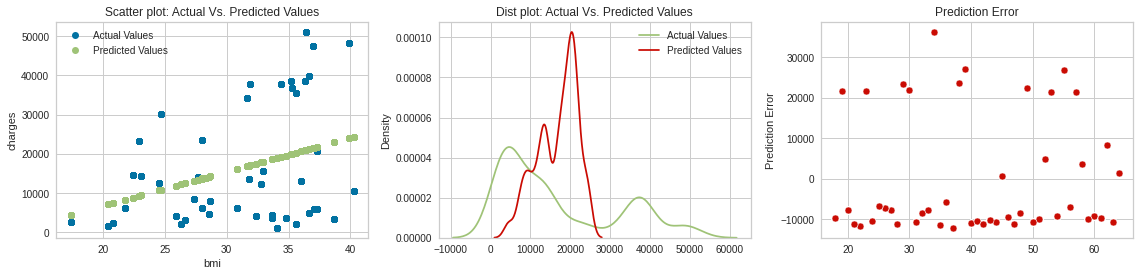

In [56]:
fig, axes =plt.subplots(1,3, figsize=(16,4))
axes[0].plot(x3['bmi'], y2,'bo',label='Actual Values')
axes[0].plot(x3['bmi'], predictions,'go',label='Predicted Values')
axes[0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0].set_xlabel("bmi")
axes[0].set_ylabel("charges")
axes[0].legend()

sns.distplot(y3, hist=False, color="g", label="Actual Values",ax=axes[1])
sns.distplot(predictions, hist=False, color="r", label="Predicted Values" , ax=axes[1])
axes[1].set_title("Dist plot: Actual Vs. Predicted Values")
axes[1].legend()

sns.scatterplot(x=df2.index,y='slr_error2',data=df2,color="r", ax=axes[2])
axes[2].set_title("Prediction Error")
axes[2].set_ylabel("Prediction Error")

fig.tight_layout()

In [33]:
# In order for higher R2 value, we used multiple regression, and we are adding one more variable, smoker

# Equation: y = a1x1 + a2x2 + b

# a1,a2 = slope
# b = intercept
# x1,x2 = input
# y = output

# The coefficient for age, bmi, non-smoker vs charges is 320.0978024, -22.52480488, 0. 
# R2 value is improved to 0.76. 

In [34]:
df3 = df2.loc[df2['smoker'] == 0]
df3.head()

,age,sex,bmi,children,smoker,region,charges,slr_error2,slr_error3
18,56,1,40.300,0,0,3,10602.38500,-9625.753524,-13750.616452
28,23,1,17.385,1,0,1,2775.19215,-11104.684242,-1776.395839
33,63,1,28.310,0,0,1,13770.09790,-7804.641682,-222.050512
32,19,0,28.600,5,0,3,4687.79700,-8422.593073,-9554.947524
31,18,0,26.315,0,0,0,2198.18985,-10719.828643,-10070.030137


In [35]:
# AGE, BMI: Multiple regression
# features = ["age","sex","bmi","children","smoker"]
x4=df3[['age','bmi','smoker']]
y4=df3[['charges']]
lr = linear_model.LinearRegression()
lr_model = lr.fit(x4, y4)

predictions4 = lr_model.predict(x4)

mlr_error = y4 - predictions4
df3['mlr_error4'] = mlr_error

print ('Slope: ', lr_model.coef_)
print ('Intercept: ',lr_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions4 - y4.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions4 - y4.values) ** 2))
print("R2-score: %.2f" % r2_score(y4.values , predictions4))

Slope:  [[320.0978024  -22.52480488   0.        ]]
Intercept:  [-3738.48465202]
Mean absolute error: 1729.49
Residual sum of squares (MSE): 8698799.68
R2-score: 0.76


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


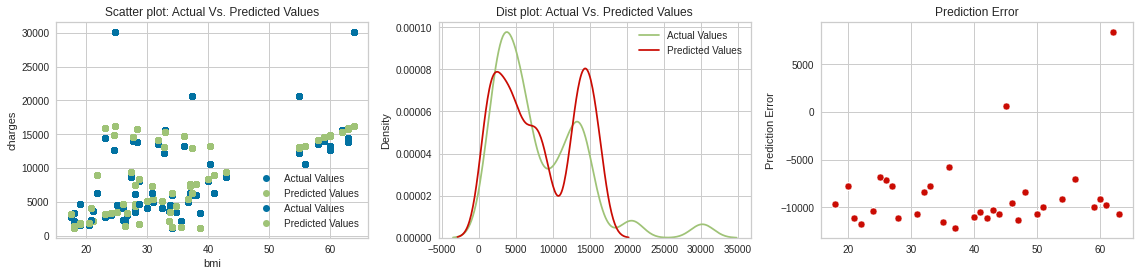

In [83]:
fig, axes =plt.subplots(1,3, figsize=(16,4))
axes[0].plot(x4['age'], y4,'bo',label='Actual Values')
axes[0].plot(x4['age'], predictions4,'go',label='Predicted Values')
axes[0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0].set_xlabel("age")
axes[0].set_ylabel("charges")
axes[0].legend()

axes[0].plot(x4['bmi'], y4,'bo',label='Actual Values')
axes[0].plot(x4['bmi'], predictions4,'go',label='Predicted Values')
axes[0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0].set_xlabel("bmi")
axes[0].set_ylabel("charges")
axes[0].legend()

sns.distplot(y4, hist=False, color="g", label="Actual Values",ax=axes[1])
sns.distplot(predictions4, hist=False, color="r", label="Predicted Values" , ax=axes[1])
axes[1].set_title("Dist plot: Actual Vs. Predicted Values")
axes[1].legend()

sns.scatterplot(x=df3.index,y='slr_error2',data=df3,color="r", ax=axes[2])
axes[2].set_title("Prediction Error")
axes[2].set_ylabel("Prediction Error")

fig.tight_layout()

In [36]:
df2.head()

,age,sex,bmi,children,smoker,region,charges,slr_error2,slr_error3
19,30,1,35.300,0,1,3,36837.46700,21610.989550,16805.088167
18,56,1,40.300,0,0,3,10602.38500,-9625.753524,-13750.616452
28,23,1,17.385,1,0,1,2775.19215,-11104.684242,-1776.395839
33,63,1,28.310,0,0,1,13770.09790,-7804.641682,-222.050512
32,19,0,28.600,5,0,3,4687.79700,-8422.593073,-9554.947524


In [37]:
# AGE, BMI: Multiple regression WITHOUT SMOKER
# features = ["age","sex","bmi","children","smoker"]
x5=df2[['age','bmi']]
y5=df2[['charges']]
lr = linear_model.LinearRegression()
lr_model = lr.fit(x5, y5)

predictions5 = lr_model.predict(x5)

mlr_error5 = y5 - predictions5
df2['mlr_error5'] = mlr_error5

print ('Slope: ', lr_model.coef_)
print ('Intercept: ',lr_model.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions5 - y5.values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predictions5 - y5.values) ** 2))
print("R2-score: %.2f" % r2_score(y5.values , predictions5))

Slope:  [[172.5286568  835.17704282]]
Intercept:  [-16151.04774268]
Mean absolute error: 11873.54
Residual sum of squares (MSE): 187808511.97
R2-score: 0.15


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


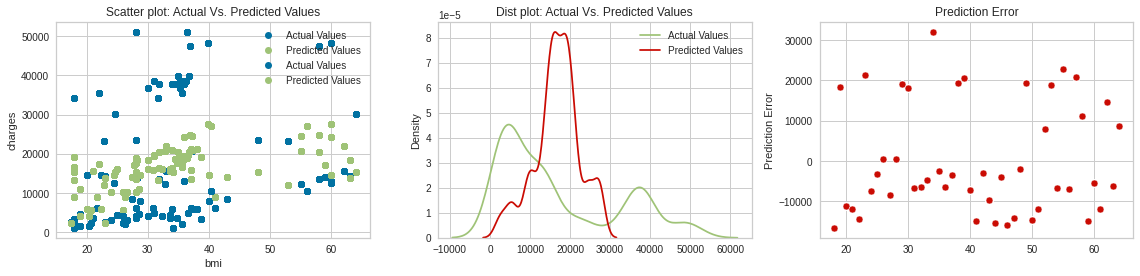

In [84]:
fig, axes =plt.subplots(1,3, figsize=(16,4))
axes[0].plot(x5['age'], y5,'bo',label='Actual Values')
axes[0].plot(x5['age'], predictions5,'go',label='Predicted Values')
axes[0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0].set_xlabel("age")
axes[0].set_ylabel("charges")
axes[0].legend()

axes[0].plot(x5['bmi'], y5,'bo',label='Actual Values')
axes[0].plot(x5['bmi'], predictions5,'go',label='Predicted Values')
axes[0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0].set_xlabel("bmi")
axes[0].set_ylabel("charges")
axes[0].legend()

sns.distplot(y5, hist=False, color="g", label="Actual Values",ax=axes[1])
sns.distplot(predictions5, hist=False, color="r", label="Predicted Values" , ax=axes[1])
axes[1].set_title("Dist plot: Actual Vs. Predicted Values")
axes[1].legend()

sns.scatterplot(x=df2.index,y='mlr_error5',data=df2,color="r", ax=axes[2])
axes[2].set_title("Prediction Error")
axes[2].set_ylabel("Prediction Error")

fig.tight_layout()

In [38]:
# We want to use more accurate regression, polynomial regression. 
# The R2 score is 0.98
# Coefficients are listed below

In [92]:
# AGE, BMI, SMOKER: Polynomial regression
# features = ["age","bmi","smoker"]
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
x6=df3[['age','bmi','smoker']]
y6=df3[['charges']]
poly = PolynomialFeatures(degree=50)
x_poly = poly.fit_transform(x6)
lr_model = lr.fit(x6, y6)

lr = linear_model.LinearRegression()
lr_model = lr.fit(x_poly, y6)

predictions6 = lr_model.predict(x_poly)

pr_error = y6 - predictions6
df3['pr_error'] = pr_error

print ('Coefficients: ', lr_model.coef_)
lr_model.coef_.shape
# print ('Intercept: ',lr_model.intercept_)

# print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions6 - y6.values)))
# print("Residual sum of squares (MSE): %.2f" % np.mean((predictions6 - y6.values) ** 2))
# print("R2-score: %.2f" % r2_score(y6.values , predictions6) )

Coefficients:  [[-2.14370435e-73  2.46138492e-74  1.07339075e-73 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(1, 23426)

In [40]:
df3.head()

,age,sex,bmi,children,smoker,region,charges,slr_error2,slr_error3,mlr_error4,pr_error
18,56,1,40.300,0,0,3,10602.38500,-9625.753524,-13750.616452,-2676.857646,7.426983
28,23,1,17.385,1,0,1,2775.19215,-11104.684242,-1776.395839,-456.978920,-484.387353
33,63,1,28.310,0,0,1,13770.09790,-7804.641682,-222.050512,-2019.901773,26.824871
32,19,0,28.600,5,0,3,4687.79700,-8422.593073,-9554.947524,2988.632826,1428.168151
31,18,0,26.315,0,0,0,2198.18985,-10719.828643,-10070.030137,767.654299,-1061.390722


In [41]:
# In order to select our best-fit features for medical cost predictin, first we will simply visualize the datapoints using relations. 
# Scatterplots for all variables. The purpose of the step is to visualize distinctive features related to charges.
# Next step will be using numerical method to chooses our features. 

# Decision Tree is a method for regression, we used it for rank importance of features in predicting charges. 
# Features are shuffled n times and the model refitted to estimate the importance of it. 
# In the below case, age (0.42) and bmi (0.33) are the values strongerly related to charges. Thus, we will first use them implementing regression. 

# SIMPLE REGRESSION
# Equation: y = ax+b

# a = slope
# b = intercept
# x = input
# y = output

# The coefficient for age vs charges is 192.37157976. However the R2 is 0.04 is quite low which indicates low accuracy of this model.

# Based on below result, equation to predict output variable using age as an input would be like,
# y = (192.37157976 * x) + 9455.3300572

# The coefficient for bmi vs charges is 864.12452383. However the R2 is 0.11 which indicates low accuracy as well. 

# Based on above result, equation to predict output variable using age as an input would be like,
# y = (864.12452383 * x) -10471.21685794

# In order for higher R2 value, we used multiple regression, and we are adding one more variable, smoker (according to visualization and old results). 

# Equation: y = a1x1 + a2x2 + b

# a1,a2 = slope
# b = intercept
# x1,x2 = input
# y = output

# The coefficient for age, bmi, non-smoker vs charges is 320.0978024, -22.52480488, 0. 
# R2 value is improved to 0.76. 

# We want to use more accurate regression, polynomial regression. 
# The R2 score is 0.98
# Coefficients are listed below

# In conclusion, polynomial regression is relative good method for our dataset based on R2 value.  

# MSE, MAE, R2

In [42]:
# fig, axes =plt.subplots(1,3, figsize=(16,4))
# axes[0].plot(x2['age'], y,'bo',label='Actual Values')
# axes[0].plot(x2['age'], predictions,'go',label='Predicted Values')
# axes[0].set_title("Scatter plot: Actual Vs. Predicted Values")
# axes[0].set_xlabel("age")
# axes[0].set_ylabel("charges")
# axes[0].legend()

# sns.distplot(y2, hist=False, color="g", label="Actual Values",ax=axes[1])
# sns.distplot(predictions, hist=False, color="r", label="Predicted Values" , ax=axes[1])
# axes[1].set_title("Dist plot: Actual Vs. Predicted Values")
# axes[1].legend()

# # sns.scatterplot(x2=y2.index,y2=df2['slr_error2'].values,data=df2,color="r", ax=axes[2])
# axes[2].set_title("Prediction Error")
# axes[2].set_ylabel("Prediction Error")

# fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


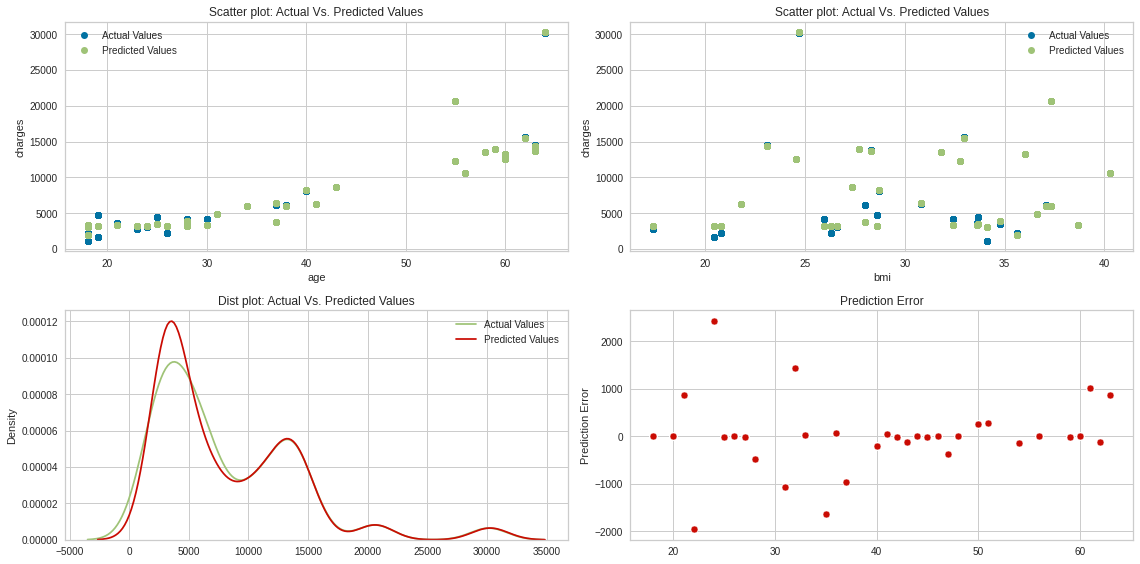

In [66]:
fig, axes =plt.subplots(2,2, figsize=(16,8))
axes[0][0].plot(x6['age'], y6,'bo',label='Actual Values')
axes[0][0].plot(x6['age'], predictions6,'go',label='Predicted Values')
axes[0][0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][0].set_xlabel('age')
axes[0][0].set_ylabel('charges')
axes[0][0].legend()

axes[0][1].plot(x6['bmi'], y6,'bo',label='Actual Values')
axes[0][1].plot(x6['bmi'], predictions6,'go',label='Predicted Values')
axes[0][1].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][1].set_xlabel("bmi")
axes[0][1].set_ylabel("charges")
axes[0][1].legend()

sns.distplot(y6, hist=False, color="g", label="Actual Values",ax=axes[1][0])
sns.distplot(predictions6, hist=False, color="r", label="Predicted Values" , ax=axes[1][0])
axes[1][0].set_title("Dist plot: Actual Vs. Predicted Values")
axes[1][0].legend()

sns.scatterplot(x=df3.index,y='pr_error',data=df3,color="r",ax=axes[1][1])
axes[1][1].set_title("Prediction Error")
axes[1][1].set_ylabel("Prediction Error")

fig.tight_layout()

In [44]:
y6.shape

(928, 1)

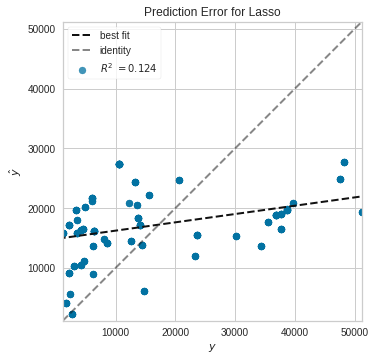

In [47]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError

# Load a regression dataset
X = df2[['age','bmi']].values
y = df2[['charges']].values

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

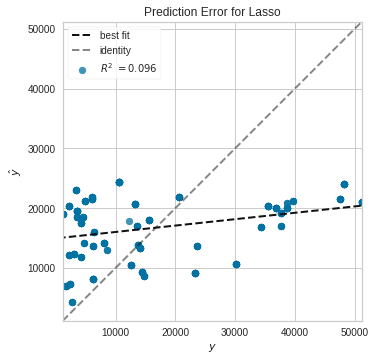

In [48]:
X = x3.values
y = y3.values

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Instantiate the linear model and visualizer
model = Lasso()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [49]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [96]:
data = pd.read_excel("542_summer.xlsx")

In [97]:
data

,Unnamed: 0,Variables,Equation,Results,R^2 Value
0,Simple LR,Age,y = ax+b,y = (192.37157976 * x) + 9455.3300572,0.04
1,Simple LR,BMI,y = ax+b,y = (864.12452383 * x) -10471.21685794,0.11
2,Multiple LR,"Age, BMI",y = a1x1 + a2x2 + b,y = 172.5286568 * x1 - 835.17704282 * x2 -161...,0.15
3,Multiple LR,"Age, BMI, Smoker",y = a1x1 + a2x2 + a3x3+ b,y = 320.0978024 * x1 - -22.52480488x2 + 0 * x...,0.76
4,Polynomial LR,"Age, BMI, Smoker",y = a1x1^n + a2x2^n + a3x3^n+ b,-2.14370435e-73 2.46138492e-74 1.07339075e-73 ...,0.98
